# **GroupBy Operations**

## **Understanding the GroupBy**

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [5]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
886,0,2,male,27.0,0,0,13.00,S,NaN
887,1,1,female,19.0,0,0,30.00,S,B
888,0,3,female,NaN,1,2,23.45,S,NaN
889,1,1,male,26.0,0,0,30.00,C,C
890,0,3,male,32.0,0,0,7.75,Q,NaN


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [7]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [8]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [9]:
titanic_slice.groupby(by = 'sex')

In [10]:
gbo = titanic_slice.groupby(by = 'sex')

In [11]:
type(gbo)

pandas.core.groupby.generic.DataFrameGroupBy

In [12]:
gbo.groups

{'female': [1, 2, 3, 8, 9], 'male': [0, 4, 5, 6, 7]}

In [13]:
gbo_l = list(gbo)

In [14]:
gbo_l[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [15]:
type(gbo_l[0])

tuple

In [16]:
gbo_l[0][0]

'female'

In [17]:
gbo_l[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [18]:
type(gbo_l[0][1])

pandas.core.frame.DataFrame

In [19]:
gbo_l[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


#### **Another approach for achieving the same result**

In [20]:
titanic_slice_f = titanic_slice.loc[titanic_slice.sex == 'female']

In [21]:
titanic_slice_f

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [22]:
titanic_slice_m = titanic_slice.loc[titanic_slice.sex == 'male']

In [23]:
titanic_slice_m

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [24]:
titanic_slice_m.equals(gbo_l[1][1])

True

In [25]:
for element in gbo:
    print(element)

('female',       sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0)
('male',     sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0)


## **Splitting with many keys**

In [26]:
import pandas as pd

In [27]:
summer = pd.read_csv('summer.csv')

In [28]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [29]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [30]:
summer.Country.nunique()

147

In [31]:
split1 = summer.groupby('Country')

In [32]:
split1_l = list(split1)

In [33]:
len(split1_l)

147

In [34]:
countries = [c[0] for c in split1_l]

In [35]:
countries.index('BUL')

19

In [36]:
split1_l[19][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
8312,1952,Helsinki,Boxing,Boxing,"NIKOLOV, Boris Georgiev",BUL,Men,71-75KG,Bronze
9390,1956,Melbourne / Stockholm,Football,Football,"DIEV, Todor Nedyalkov",BUL,Men,Football,Bronze
9391,1956,Melbourne / Stockholm,Football,Football,"KOLEV, Ivan Petkov",BUL,Men,Football,Bronze
9392,1956,Melbourne / Stockholm,Football,Football,"KOVATCHEV, Nikolai Dimitrov",BUL,Men,Football,Bronze
9393,1956,Melbourne / Stockholm,Football,Football,"MANOLOV, Manol Tomov",BUL,Men,Football,Bronze
...,...,...,...,...,...,...,...,...,...
29172,2008,Beijing,Wrestling,Wrestling Free.,"ZLATEVA, Stanka",BUL,Women,63 - 72KG,Silver
29174,2008,Beijing,Wrestling,Wrestling Free.,"TERZIEV, Kiril",BUL,Men,66 - 74KG,Bronze
29202,2008,Beijing,Wrestling,Wrestling Gre-R,"YANAKIEV, Yavor",BUL,Men,66 - 74KG,Bronze
29919,2012,London,Boxing,Boxing,"PULEV, Tervel",BUL,Men,81 - 91KG,Bronze


In [37]:
split2 = summer.groupby(by = ['Country', 'Gender'])

In [38]:
split2_l = list(split2)

In [39]:
split2_l[30:32]

[(('BUL', 'Men'),
         Year                   City      Sport       Discipline  \
  8312   1952               Helsinki     Boxing           Boxing   
  9390   1956  Melbourne / Stockholm   Football         Football   
  9391   1956  Melbourne / Stockholm   Football         Football   
  9392   1956  Melbourne / Stockholm   Football         Football   
  9393   1956  Melbourne / Stockholm   Football         Football   
  ...     ...                    ...        ...              ...   
  27156  2004                 Athens  Wrestling  Wrestling Gre-R   
  29150  2008                Beijing  Wrestling  Wrestling Free.   
  29174  2008                Beijing  Wrestling  Wrestling Free.   
  29202  2008                Beijing  Wrestling  Wrestling Gre-R   
  29919  2012                 London     Boxing           Boxing   
  
                             Athlete Country Gender      Event   Medal  
  8312       NIKOLOV, Boris Georgiev     BUL    Men    71-75KG  Bronze  
  9390         DI

## **Split-Apply-Combine explained**

In [40]:
import pandas as pd

In [41]:
titanic = pd.read_csv('titanic.csv')

In [42]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [43]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [44]:
list(titanic_slice.groupby('sex'))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [45]:
list(titanic_slice.groupby('sex'))[0][1].age.mean()

28.0

In [46]:
list(titanic_slice.groupby('sex'))[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [47]:
list(titanic_slice.groupby('sex'))[1][1].age.mean()

28.25

In [48]:
titanic_slice.groupby('sex').mean()

,age
sex,
female,28.00
male,28.25


In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [50]:
titanic.groupby('sex').sum(numeric_only = True)

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


In [51]:
titanic.groupby('sex').survived.sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [52]:
titanic.groupby('sex')[['fare', 'age']].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [53]:
l = list(titanic.groupby('sex'))

In [54]:
l[0][1].age.max()

63.0

In [55]:
l[1][1].age.max()

80.0

In [56]:
titanic_mean = titanic.groupby('sex').mean(numeric_only = True)

In [57]:
titanic_mean

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

In [59]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [60]:
plt.style.use("seaborn-v0_8")

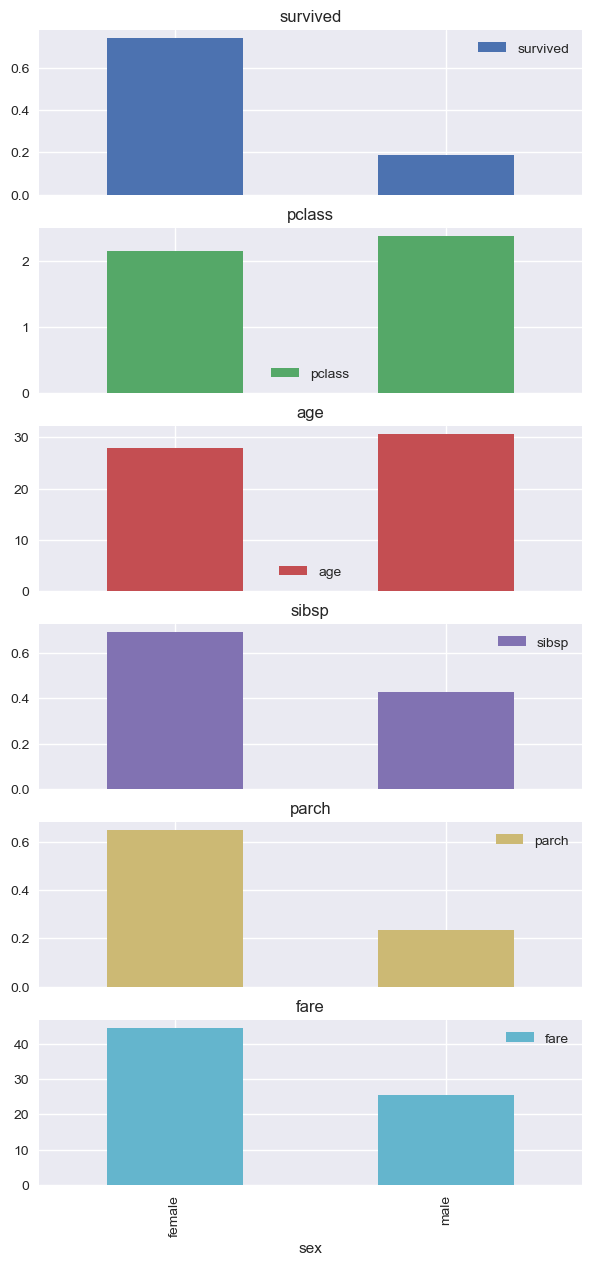

In [61]:
titanic_mean.plot(kind = 'bar', figsize = (7, 15), subplots = True)
plt.show()

## **Split-Apply-Combine applied**

In [62]:
import pandas as pd

In [63]:
summer = pd.read_csv('summer.csv')

In [64]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [65]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [66]:
summer.groupby('Country')

In [67]:
medals_by_country = summer.groupby('Country').Medal.count()

In [68]:
medals_by_country

Country
AFG      2
AHO      1
ALG     15
ANZ     29
ARG    259
      ... 
VIE      2
YUG    435
ZAM      2
ZIM     23
ZZX     48
Name: Medal, Length: 147, dtype: int64

In [69]:
top20 = medals_by_country.nlargest(20)

In [70]:
top20

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

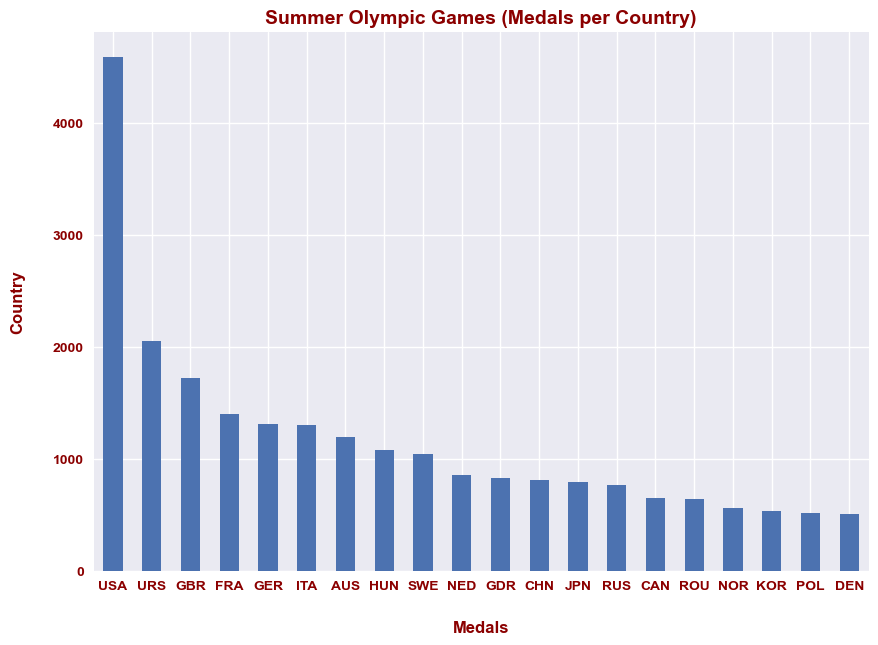

In [72]:
font_dict_common = {
    'weight': 'bold',
    'family': 'sans',
    'color': 'darkred'
}
font_dict_specific = {
    'labelpad': 20,
    'fontsize': 12
}
top20.plot(kind = 'bar', figsize = (10, 7))
plt.xlabel('Medals', **font_dict_common, **font_dict_specific)
plt.xticks(**font_dict_common, fontsize = 10, rotation = 0)
plt.ylabel('Country', **font_dict_common, **font_dict_specific)
plt.yticks(**font_dict_common, fontsize = 10)
plt.title('Summer Olympic Games (Medals per Country)', **font_dict_common, fontsize = 14)
plt.show()

In [73]:
titanic = pd.read_csv('titanic.csv')

In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [75]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
titanic.groupby('pclass').fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [77]:
titanic.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [78]:
titanic.groupby('pclass').survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [79]:
titanic['ad_chi'] = 'adult'

In [80]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
5,0,3,male,NaN,0,0,8.4583,Q,NaN,adult
6,0,1,male,54.0,0,0,51.8625,S,E,adult
7,0,3,male,2.0,3,1,21.0750,S,NaN,adult
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,adult


In [81]:
titanic.loc[titanic.age < 18, 'ad_chi'] = 'child'

In [82]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
5,0,3,male,NaN,0,0,8.4583,Q,NaN,adult
6,0,1,male,54.0,0,0,51.8625,S,E,adult
7,0,3,male,2.0,3,1,21.0750,S,NaN,child
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,child


In [83]:
titanic.ad_chi.value_counts()

ad_chi
adult    778
child    113
Name: count, dtype: int64

In [84]:
titanic.groupby('ad_chi').survived.mean()

ad_chi
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [85]:
titanic.groupby(['sex', 'ad_chi']).survived.count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [86]:
titanic.groupby(['sex', 'ad_chi']).survived.mean()

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    adult     0.165703
        child     0.396552
Name: survived, dtype: float64

In [87]:
survival_rate = titanic.groupby(['sex', 'ad_chi']).survived.mean().sort_values(ascending = False)

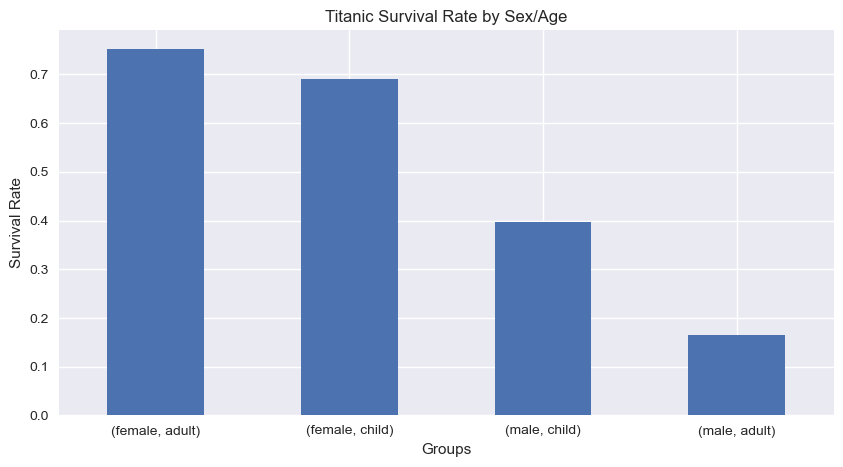

In [88]:
survival_rate.plot(kind = 'bar', figsize = (10, 5))
plt.title('Titanic Survival Rate by Sex/Age')
plt.xlabel('Groups')
plt.xticks(rotation = 0)
plt.ylabel('Survival Rate')
plt.show()

## **Advanced agregation with agg()**

In [89]:
import pandas as pd

In [90]:
titanic = pd.read_csv('titanic.csv', usecols = ['survived', 'pclass', 'sex', 'age', 'fare'])

In [91]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [92]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [93]:
titanic.groupby('sex').mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [94]:
titanic.groupby('sex').sum()

,survived,pclass,age,fare
sex,,,,
female,233,678,7286.00,13966.6628
male,109,1379,13919.17,14727.2865


In [95]:
titanic.groupby('sex').agg(['mean', 'sum'])

survived         pclass              age                 fare  \
            mean  sum      mean   sum       mean       sum       mean   
sex                                                                     
female  0.742038  233  2.159236   678  27.915709   7286.00  44.479818   
male    0.188908  109  2.389948  1379  30.726645  13919.17  25.523893   

                    
               sum  
sex                 
female  13966.6628  
male    14727.2865

In [96]:
titanic.groupby('sex').agg(['mean', 'sum', 'min', 'max'])

survived                 pclass                      age            \
            mean  sum min max      mean   sum min max       mean       sum   
sex                                                                          
female  0.742038  233   0   1  2.159236   678   1   3  27.915709   7286.00   
male    0.188908  109   0   1  2.389948  1379   1   3  30.726645  13919.17   

                         fare                              
         min   max       mean         sum   min       max  
sex                                                        
female  0.75  63.0  44.479818  13966.6628  6.75  512.3292  
male    0.42  80.0  25.523893  14727.2865  0.00  512.3292

In [97]:
titanic.groupby('sex').agg({'survived': ['mean', 'sum'], 'pclass': ['mean']})

survived         pclass
            mean  sum      mean
sex                            
female  0.742038  233  2.159236
male    0.188908  109  2.389948

In [98]:
titanic.groupby('sex').agg({'survived': ['mean', 'sum'], 'pclass': ['mean'], 'age': ['min', 'max'], 'fare': ['mean', 'min', 'max']})

survived         pclass   age             fare                
            mean  sum      mean   min   max       mean   min       max
sex                                                                   
female  0.742038  233  2.159236  0.75  63.0  44.479818  6.75  512.3292
male    0.188908  109  2.389948  0.42  80.0  25.523893  0.00  512.3292

## **GroupBy aggregation with relabeling**

In [99]:
import pandas as pd

In [100]:
titanic = pd.read_csv('titanic.csv',usecols = ['survived', 'pclass', 'sex', 'age', 'fare'])

In [101]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [102]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [103]:
titanic.groupby('sex').mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [104]:
titanic.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [105]:
titanic.groupby('sex').agg(survival_rate = ('survived', 'mean'))

,survival_rate
sex,
female,0.742038
male,0.188908


In [106]:
titanic.groupby('sex').agg({'survived': ['mean', 'sum'], 'age': ['mean']})

survived             age
            mean  sum       mean
sex                             
female  0.742038  233  27.915709
male    0.188908  109  30.726645

In [107]:
titanic.groupby('sex').agg(survived_total = ('survived', 'sum'), survival_rate = ('survived', 'mean'), mean_age = ('age', 'mean'))

,survived_total,survival_rate,mean_age
sex,,,
female,233,0.742038,27.915709
male,109,0.188908,30.726645


## **Transformation with transform()**

In [108]:
import pandas as pd

In [109]:
titanic = pd.read_csv('titanic.csv')

In [110]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [111]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [112]:
titanic.groupby(['sex', 'pclass']).survived.mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [113]:
titanic.groupby(['sex', 'pclass']).survived.transform(func = 'mean')

0      0.135447
1      0.968085
2      0.500000
3      0.968085
4      0.135447
         ...   
886    0.157407
887    0.968085
888    0.500000
889    0.368852
890    0.135447
Name: survived, Length: 891, dtype: float64

In [114]:
titanic['group_survival_rate'] = titanic.groupby(['sex', 'pclass']).survived.transform(func = 'mean')

In [115]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_survival_rate
0,0,3,male,22.0,1,0,7.2500,S,NaN,0.135447
1,1,1,female,38.0,1,0,71.2833,C,C,0.968085
2,1,3,female,26.0,0,0,7.9250,S,NaN,0.500000
3,1,1,female,35.0,1,0,53.1000,S,C,0.968085
4,0,3,male,35.0,0,0,8.0500,S,NaN,0.135447
5,0,3,male,NaN,0,0,8.4583,Q,NaN,0.135447
6,0,1,male,54.0,0,0,51.8625,S,E,0.368852
7,0,3,male,2.0,3,1,21.0750,S,NaN,0.135447
8,1,3,female,27.0,0,2,11.1333,S,NaN,0.500000
9,1,2,female,14.0,1,0,30.0708,C,NaN,0.921053


In [116]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [117]:
titanic['outliers'] = abs(titanic.survived - titanic.group_survival_rate)

In [118]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_survival_rate,outliers
0,0,3,male,22.0,1,0,7.2500,S,NaN,0.135447,0.135447
1,1,1,female,38.0,1,0,71.2833,C,C,0.968085,0.031915
2,1,3,female,26.0,0,0,7.9250,S,NaN,0.500000,0.500000
3,1,1,female,35.0,1,0,53.1000,S,C,0.968085,0.031915
4,0,3,male,35.0,0,0,8.0500,S,NaN,0.135447,0.135447
5,0,3,male,NaN,0,0,8.4583,Q,NaN,0.135447,0.135447
6,0,1,male,54.0,0,0,51.8625,S,E,0.368852,0.368852
7,0,3,male,2.0,3,1,21.0750,S,NaN,0.135447,0.135447
8,1,3,female,27.0,0,2,11.1333,S,NaN,0.500000,0.500000
9,1,2,female,14.0,1,0,30.0708,C,NaN,0.921053,0.078947


In [119]:
titanic.loc[titanic.outliers > 0.85]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_survival_rate,outliers
36,1,3,male,NaN,0,0,7.2292,C,NaN,0.135447,0.864553
41,0,2,female,27.00,1,0,21.0000,S,NaN,0.921053,0.921053
65,1,3,male,NaN,1,1,15.2458,C,NaN,0.135447,0.864553
74,1,3,male,32.00,0,0,56.4958,S,NaN,0.135447,0.864553
81,1,3,male,29.00,0,0,9.5000,S,NaN,0.135447,0.864553
107,1,3,male,NaN,0,0,7.7750,S,NaN,0.135447,0.864553
125,1,3,male,12.00,1,0,11.2417,C,NaN,0.135447,0.864553
127,1,3,male,24.00,0,0,7.1417,S,NaN,0.135447,0.864553
146,1,3,male,27.00,0,0,7.7958,S,NaN,0.135447,0.864553
165,1,3,male,9.00,0,2,20.5250,S,NaN,0.135447,0.864553


## **Replace NA values by group-specific values**

In [120]:
import pandas as pd

In [121]:
titanic = pd.read_csv('titanic.csv')

In [122]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [123]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [124]:
mean_age = titanic.age.mean()

In [125]:
mean_age

29.69911764705882

In [126]:
titanic.age.fillna(mean_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [127]:
titanic.groupby(['sex', 'pclass']).age.mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [128]:
titanic['group_mean_age'] = titanic.groupby(['sex', 'pclass']).age.transform(func = 'mean')

In [129]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.0,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.0,1,0,71.2833,C,C,34.611765
2,1,3,female,26.0,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.0,1,0,53.1000,S,C,34.611765
4,0,3,male,35.0,0,0,8.0500,S,NaN,26.507589


In [130]:
titanic.age.fillna(titanic.group_mean_age, inplace = True)

In [131]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.000000,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.000000,1,0,71.2833,C,C,34.611765
2,1,3,female,26.000000,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.000000,1,0,53.1000,S,C,34.611765
4,0,3,male,35.000000,0,0,8.0500,S,NaN,26.507589
5,0,3,male,26.507589,0,0,8.4583,Q,NaN,26.507589
6,0,1,male,54.000000,0,0,51.8625,S,E,41.281386
7,0,3,male,2.000000,3,1,21.0750,S,NaN,26.507589
8,1,3,female,27.000000,0,2,11.1333,S,NaN,21.750000
9,1,2,female,14.000000,1,0,30.0708,C,NaN,28.722973


## **Generalize split-apply-combine with apply()**

In [132]:
import pandas as pd

In [133]:
titanic = pd.read_csv('titanic.csv', usecols = ['survived', 'pclass', 'sex', 'age', 'fare'])

In [134]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [135]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [136]:
titanic.groupby('sex').mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [137]:
groups = titanic.groupby('sex')

In [138]:
female_group = list(groups)[0][1]

In [139]:
female_group

,survived,pclass,sex,age,fare
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708
...,...,...,...,...,...
880,1,2,female,25.0,26.0000
882,0,3,female,22.0,10.5167
885,0,3,female,39.0,29.1250
887,1,1,female,19.0,30.0000


In [140]:
female_group.mean(numeric_only = True)

survived     0.742038
pclass       2.159236
age         27.915709
fare        44.479818
dtype: float64

In [141]:
def group_mean(group_df):
    return group_df.mean(numeric_only = True)

In [142]:
group_mean(female_group)

survived     0.742038
pclass       2.159236
age         27.915709
fare        44.479818
dtype: float64

In [143]:
titanic.groupby('sex').apply(group_mean)

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [144]:
titanic.nlargest(5, 'age')

,survived,pclass,sex,age,fare
630,1,1,male,80.0,30.0000
851,0,3,male,74.0,7.7750
96,0,1,male,71.0,34.6542
493,0,1,male,71.0,49.5042
116,0,3,male,70.5,7.7500


In [145]:
def group_oldest(group_df):
    return group_df[group_df.survived == 1].nlargest(5, 'age')

In [146]:
titanic.groupby('sex').apply(group_oldest)

survived  pclass     sex   age     fare
sex                                                
female 275         1       1  female  63.0  77.9583
       483         1       3  female  63.0   9.5875
       829         1       1  female  62.0  80.0000
       366         1       1  female  60.0  75.2500
       11          1       1  female  58.0  26.5500
male   630         1       1    male  80.0  30.0000
       570         1       2    male  62.0  10.5000
       587         1       1    male  60.0  79.2000
       647         1       1    male  56.0  35.5000
       449         1       1    male  52.0  30.5000

## **Hierarchical indexing with groupby()**

In [147]:
import pandas as pd

In [148]:
titanic = pd.read_csv('titanic.csv', usecols = ['survived', 'pclass', 'sex', 'age', 'fare'])

In [149]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [150]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [151]:
summery = titanic.groupby(['sex', 'pclass']).mean()

In [152]:
summery

survived        age        fare
sex    pclass                                 
female 1       0.968085  34.611765  106.125798
       2       0.921053  28.722973   21.970121
       3       0.500000  21.750000   16.118810
male   1       0.368852  41.281386   67.226127
       2       0.157407  30.740707   19.741782
       3       0.135447  26.507589   12.661633

In [153]:
summery.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

In [154]:
summery.loc[('female', 2), :]

survived     0.921053
age         28.722973
fare        21.970121
Name: (female, 2), dtype: float64

In [155]:
summery.loc[('female', 2), 'age']

28.722972972972972

In [156]:
summery.swaplevel().sort_index()

survived        age        fare
pclass sex                                    
1      female  0.968085  34.611765  106.125798
       male    0.368852  41.281386   67.226127
2      female  0.921053  28.722973   21.970121
       male    0.157407  30.740707   19.741782
3      female  0.500000  21.750000   16.118810
       male    0.135447  26.507589   12.661633

In [157]:
summery.reset_index()

,sex,pclass,survived,age,fare
0,female,1,0.968085,34.611765,106.125798
1,female,2,0.921053,28.722973,21.970121
2,female,3,0.500000,21.750000,16.118810
3,male,1,0.368852,41.281386,67.226127
4,male,2,0.157407,30.740707,19.741782
5,male,3,0.135447,26.507589,12.661633


## **stack() and unstack()**

In [158]:
import pandas as pd

In [159]:
summer = pd.read_csv('summer.csv')

In [160]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [161]:
summer.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [162]:
medals_by_country = summer.groupby(['Country', 'Medal']).Medal.count()

In [163]:
medals_by_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [164]:
medals_by_country.loc['BUL']

Medal
Bronze    137
Gold       53
Silver    143
Name: Medal, dtype: int64

In [165]:
medals_by_country.shape

(347,)

In [166]:
medals_by_country.loc['DEN', 'Gold']

150

In [167]:
medals_by_country = medals_by_country.unstack(level = -1, fill_value = 0)

In [168]:
medals_by_country

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99
...,...,...,...
VIE,0,0,2
YUG,118,143,174
ZAM,1,0,1


In [169]:
medals_by_country.loc['DEN']

Medal
Bronze    160
Gold      150
Silver    197
Name: DEN, dtype: int64

In [170]:
medals_by_country = medals_by_country[['Gold', 'Silver', 'Bronze']]

In [171]:
medals_by_country.head()

Medal,Gold,Silver,Bronze
Country,,,
AFG,0,0,2
AHO,0,1,0
ALG,5,2,8
ANZ,20,4,5
ARG,69,99,91


In [172]:
medals_by_country.sort_values(by = ['Gold', 'Silver', 'Bronze'], ascending = [False, False, False], inplace = True)

In [173]:
medals_by_country.head(10)

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225


In [174]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

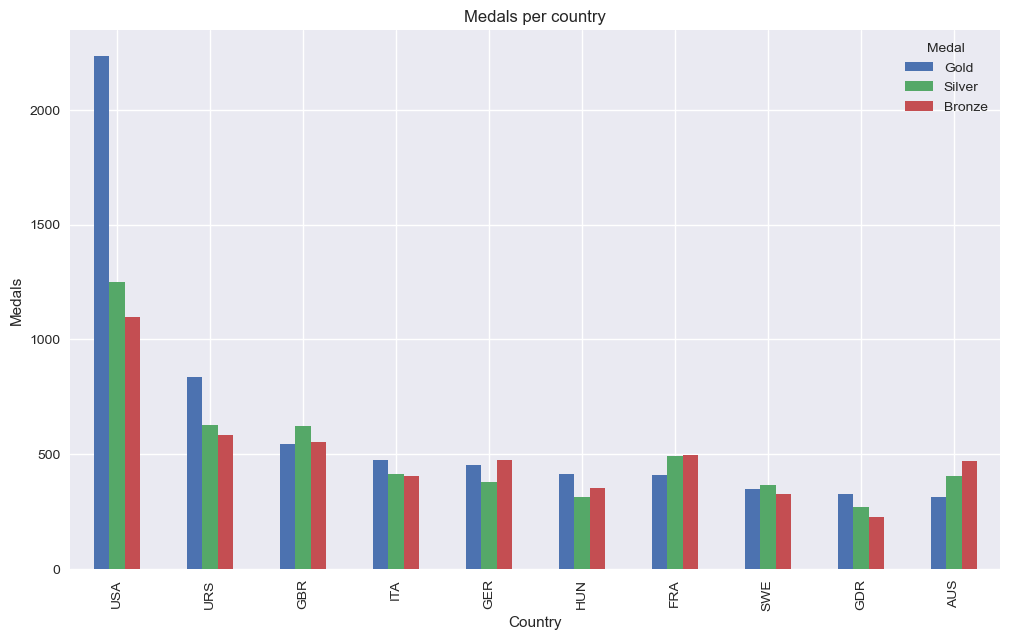

In [175]:
medals_by_country.head(10).plot(kind = 'bar', figsize = (12, 7))
plt.title('Medals per country')
plt.xlabel('Country')
plt.ylabel('Medals')
plt.show()

In [176]:
medals_by_country.stack().unstack()

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
...,...,...,...
IRQ,0,0,1
MKD,0,0,1
MRI,0,0,1
